# 0.) Import the Credit Card Fraud Data From CCLE

In [134]:
#pip install scikit-learn

In [135]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [136]:
#drive.mount('/content/gdrive/', force_remount = True)

In [137]:
df = pd.read_csv("fraudTest.csv")

In [138]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [139]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

C:\Users\alexa\AppData\Local\Temp\ipykernel_8364\2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
C:\Users\alexa\AppData\Local\Temp\ipykernel_8364\2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)


In [142]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)


In [143]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)
X_holdout = pd.DataFrame(scaler.transform(X_holdout),columns=X_holdout.columns)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [144]:
#pip uninstall scikit-learn

In [145]:
#pip install imblearn

In [146]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [147]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [150]:
over_log.score(X_test, y_test)

0.9274454761390628

In [151]:
under_log.score(X_test, y_test)

0.9264137815206699

In [152]:
smote_log.score(X_test, y_test)

0.9250701792269488

In [153]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [154]:
# Sensitivity here in credit fraud is more important as seen from last class

In [155]:
from sklearn.metrics import confusion_matrix

In [156]:
y_true = y_test

In [157]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[77068,  5972],
       [   76,   242]], dtype=int64)

In [158]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7610062893081762


In [159]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76982,  6058],
       [   76,   242]], dtype=int64)

In [160]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7610062893081762


In [161]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76870,  6170],
       [   76,   242]], dtype=int64)

In [162]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7610062893081762


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [163]:
import pandas as pd

In [164]:
X_train

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,-0.042964,-0.289896,-0.606239,-0.278804,-0.274686,2.977148,-0.190604,-0.323455,-0.26618,-0.322946,-0.309429,-0.227421,-0.257378,-0.275708,-0.284899,-0.314765,-0.18006
1,0.092765,-0.290029,0.607484,3.586745,-0.274686,-0.335892,-0.190604,-0.323455,-0.26618,-0.322946,-0.309429,-0.227421,-0.257378,-0.275708,-0.284899,-0.314765,-0.18006
2,0.349507,-0.284272,-1.473184,-0.278804,-0.274686,-0.335892,-0.190604,-0.323455,-0.26618,-0.322946,3.231763,-0.227421,-0.257378,-0.275708,-0.284899,-0.314765,-0.18006
3,-0.412685,0.134562,0.838669,-0.278804,-0.274686,-0.335892,-0.190604,-0.323455,-0.26618,-0.322946,-0.309429,4.397125,-0.257378,-0.275708,-0.284899,-0.314765,-0.18006
4,-0.153887,0.420714,1.185447,-0.278804,-0.274686,-0.335892,5.246480,-0.323455,-0.26618,-0.322946,-0.309429,-0.227421,-0.257378,-0.275708,-0.284899,-0.314765,-0.18006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388998,-0.060123,-0.286109,1.358836,-0.278804,-0.274686,2.977148,-0.190604,-0.323455,-0.26618,-0.322946,-0.309429,-0.227421,-0.257378,-0.275708,-0.284899,-0.314765,-0.18006
388999,-0.415512,-0.286718,1.069854,-0.278804,-0.274686,-0.335892,-0.190604,-0.323455,-0.26618,-0.322946,-0.309429,-0.227421,-0.257378,-0.275708,3.510014,-0.314765,-0.18006
389000,0.059733,-0.292462,0.202909,3.586745,-0.274686,-0.335892,-0.190604,-0.323455,-0.26618,-0.322946,-0.309429,-0.227421,-0.257378,-0.275708,-0.284899,-0.314765,-0.18006
389001,-0.147589,-0.289536,-0.086072,-0.278804,-0.274686,2.977148,-0.190604,-0.323455,-0.26618,-0.322946,-0.309429,-0.227421,-0.257378,-0.275708,-0.284899,-0.314765,-0.18006


In [165]:
raw_temp = pd.concat([X_train, y_train], axis =1)

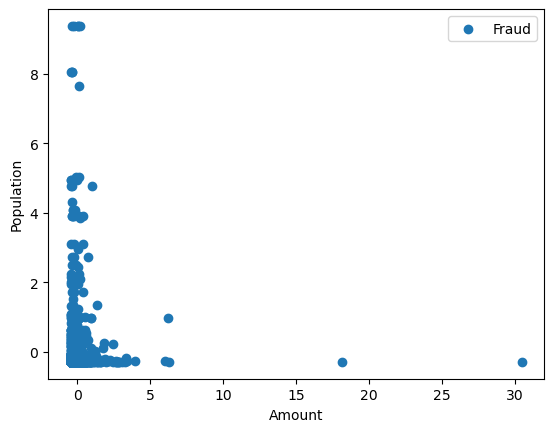

In [166]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [167]:

raw_temp = pd.concat([smote_X, smote_y], axis =1)


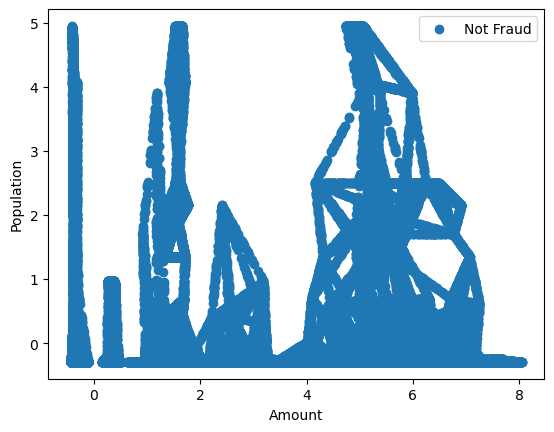

In [168]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [169]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [170]:
from sklearn.linear_model import LogisticRegression

# To use the liblinear solver, you can specify it when creating the LogisticRegression instance
from sklearn.linear_model import LogisticRegression

In [171]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [172]:
resampling_methods = {
    'over' : RandomOverSampler,
    'under' : RandomUnderSampler,
    'smote' : SMOTE
    
}
   
model_configs = {
    'LOG' : LogisticRegression(),
    "LASSO" : LogisticRegression(penalty="l1",C=2.,solver="liblinear"),
    'DTREE' : DecisionTreeClassifier()
    
}
   

In [173]:
resampling_methods={
    "over": RandomOverSampler(),
    "under": RandomUnderSampler(),
    "smote": SMOTE(),   
}

model_configs={
    "LOG" : LogisticRegression(),
    "LASSO" : LogisticRegression(penalty="l1",C=2.,solver="liblinear"),
    "DTREE" : DecisionTreeClassifier()
}

In [174]:
def calc_perf_metric(y_true, y_pred):
    tn, fp, fn, tp=confusion_matrix(y_true, y_pred).ravel()
    
    sensitivity=tp/(tp+fn)
    specificity=tn/(tn+fp)
    precision= precision_score(y_true, y_pred)
    recall=recall_score(y_true, y_pred)
    f1=f1_score(y_true, y_pred)
    
    return(sensitivity,specificity, precision, recall, f1)

In [175]:
trained_models={}
results=[]

In [176]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y=resampler.fit_resample(X_train,y_train)
    
    for model_key, model in model_configs.items():
        combined_key=f"{resample_key}_{model_key}"
        
        m=model.fit(resample_X,resample_y)
        
        trained_models[combined_key]=m
        y_pred=m.predict(X_test)
        
        sensitivity, specificity, precision, recall, f1= calc_perf_metric(y_true, y_pred)
        
        results.append({"Model":combined_key,
                       "Sensitivity": sensitivity,
                       "Specificity": specificity,
                       "Precision": precision,
                       "Recall": recall,
                       "F1":f1})

In [177]:
results=pd.DataFrame(results)

In [178]:
results

,Model,Sensitivity,Specificity,Precision,Recall,F1
0,over_LOG,0.761006,0.928456,0.039140,0.761006,0.074450
1,over_LASSO,0.761006,0.928456,0.039140,0.761006,0.074450
2,over_DTREE,0.550314,0.998218,0.541796,0.550314,0.546022
3,under_LOG,0.764151,0.925000,0.037552,0.764151,0.071586
4,under_LASSO,0.764151,0.924506,0.037316,0.764151,0.071157
5,under_DTREE,0.949686,0.944063,0.061047,0.949686,0.114720
6,smote_LOG,0.761006,0.926867,0.038321,0.761006,0.072968
7,smote_LASSO,0.761006,0.926903,0.038340,0.761006,0.073002
8,smote_DTREE,0.685535,0.992437,0.257683,0.685535,0.374570


The best performing model with a high f1 score of 0.595 was the Over_Decision_Tree model with a high f1 score of 0.595. It has the highest precision and lowest recall among all competing models and has the best all around results. Although when comparing the sensitivity it might be more important in fraud detection to pick a model with higher sensitivity.

That being said possibly the best model for this exercise was the smote_DTREE model being the second highest in f1 with a much higher sensitivity.